In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

In [39]:
import plotly.graph_objects as go
from plotly.colors import n_colors

This is a layout helper function that is making our plots look a bit nicer, i.e. no grid in the background.

In [2]:
def layout_helper(fig):
    fig.update_layout(xaxis=dict(showgrid=False), yaxis=dict(showgrid=False))
    fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)', 'paper_bgcolor':'rgba(0,0,0,0)'})
    fig.update_layout(yaxis_title = None, xaxis_title = None)
    return fig

## Demo

In [3]:
df = pd.read_csv('data/final/cantons.csv')

The most basic visualisation type is: a simple number!

In [6]:
from IPython.core.display import display, HTML
display(HTML('<h1>{} cantons.</h1>'.format(len(df.canton.unique()))))

Other well known-visualisation type: a table.

In [24]:
# out-of-the-box table visualisation in jupyter lab:
df[df.canton == 'Aargau'].head(10)

,canton,year,taxable_income_chf,taxable_income_per_capita
9,Aargau,2010,20044000000,68237
22,Aargau,2011,19309000000,70915
35,Aargau,2012,19696000000,71167
48,Aargau,2013,20105000000,71290
61,Aargau,2014,20489000000,71410
74,Aargau,2015,20881000000,71978
87,Aargau,2016,21769000000,73410
91,Aargau,2017,22175000000,74000
113,Aargau,2018,22852000000,74614


In [70]:
cantons = df.sort_values(by='canton').canton.unique()
tax_2016 = df[df.year==2016].sort_values(by='canton').taxable_income_per_capita.reset_index(drop=True)
tax_2017 = df[df.year==2017].sort_values(by='canton').taxable_income_per_capita.reset_index(drop=True)
tax_2018 = df[df.year==2018].sort_values(by='canton').taxable_income_per_capita.reset_index(drop=True)

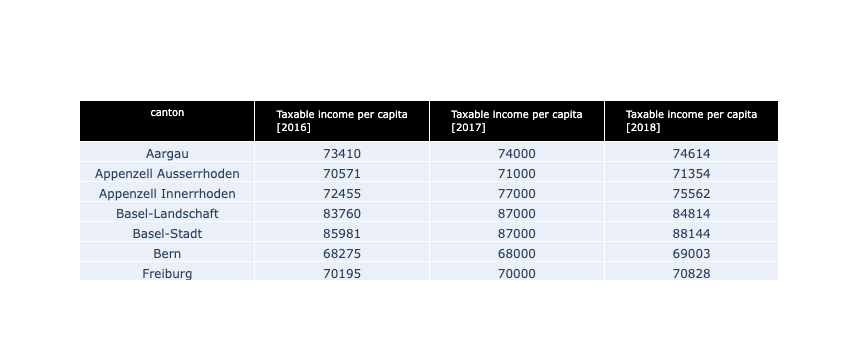

In [36]:
fig = go.Figure(data=[go.Table(
    header = dict(
        values=['canton','Taxable income per capita [2016]','Taxable income per capita [2017]','Taxable income per capita [2018]'],
        line_color='white',fill_color='black',
        align='center',font=dict(color='white',size=10)
    ),
    cells=dict(
        values= [ cantons,tax_2016,tax_2017, tax_2018
                ])
)
                     ])

fig.show()

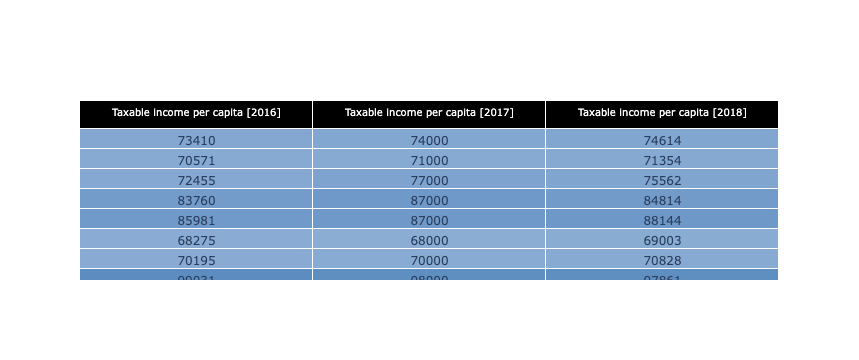

In [98]:
colors = np.array(n_colors('rgb(239,243,255)', 'rgb(8, 81, 156)', max(df.taxable_income_per_capita), colortype='rgb'))

fig = go.Figure(data=[go.Table(
    header = dict(
        values=['Taxable income per capita [2016]','Taxable income per capita [2017]','Taxable income per capita [2018]'],
        line_color='white',fill_color='black',
        align='center',font=dict(color='white',size=10)
    ),
    cells=dict(
        values= [ tax_2016,tax_2017, tax_2018
                ],
        fill_color = [colors[tax_2016], colors[tax_2017], colors[tax_2018]]
    )
)
                     ])

fig.show()

In [71]:
tax_2010 = df[df.year==2010].sort_values(by='canton').taxable_income_per_capita.reset_index(drop=True)
tax_2011 = df[df.year==2011].sort_values(by='canton').taxable_income_per_capita.reset_index(drop=True)
tax_2012 = df[df.year==2012].sort_values(by='canton').taxable_income_per_capita.reset_index(drop=True)
tax_2013 = df[df.year==2013].sort_values(by='canton').taxable_income_per_capita.reset_index(drop=True)
tax_2014 = df[df.year==2014].sort_values(by='canton').taxable_income_per_capita.reset_index(drop=True)
tax_2015 = df[df.year==2015].sort_values(by='canton').taxable_income_per_capita.reset_index(drop=True)

In [73]:
df_pivot = pd.concat([tax_2010,tax_2011,tax_2012,tax_2013,tax_2014,tax_2015,tax_2016,tax_2017,tax_2018]
                     ,axis=1,
                    ignore_index=True)

In [74]:
df_pivot

,0,1,2,3,4,5,6,7,8
0,68237,70915,71167,71290,71410,71978,73410,74000,74614
1,66366,68013,68003,68098,68428,69238,70571,71000,71354
2,65676,69299,69083,69817,70970,75234,72455,77000,75562
3,77184,79421,79812,80780,81945,82569,83760,87000,84814
4,75894,79435,80003,82054,83694,84591,85981,87000,88144
5,63054,65301,65398,65856,66297,67022,68275,68000,69003
6,64008,68507,68083,69674,68952,70005,70195,70000,70828
7,91483,95478,95123,96229,107701,99993,99031,98000,97861
8,59252,60977,60855,63518,62544,62596,63242,63000,64093
9,61019,62272,62039,62637,62870,63200,64208,65000,65248


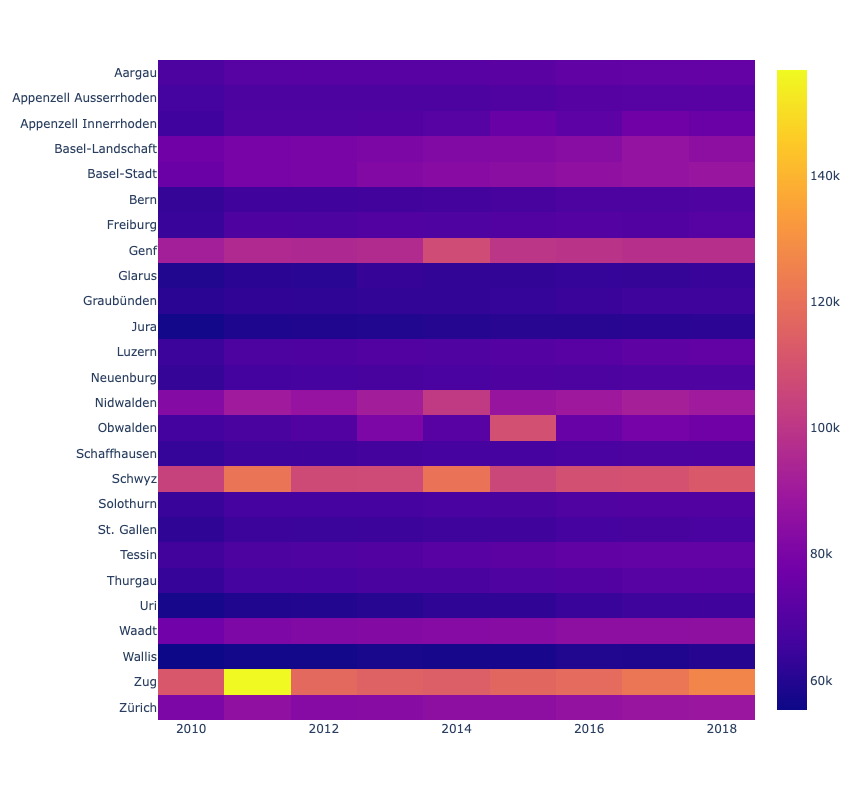

In [92]:
fig = px.imshow(df_pivot,
                x=list(range(2010,2019,1)),
                y = df.sort_values(by='canton').canton.unique(),
               width=800,height=800)

layout_helper(fig).show()

In [ ]:
# cinemas?